# ML Zoomcamp Cohort 2024
# Homework 4

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

### Dataset

In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

You can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
unzip bank+marketing.zip 
unzip bank.zip
```

We need `bank-full.csv`.

In this dataset the target variable is `y` variable - has the client subscribed a term deposit or not.  

### Features

For the rest of the homework, you'll need to use only these columns:

* `'age'`,
* `'job'`,
* `'marital'`,
* `'education'`,
* `'balance'`,
* `'housing'`,
* `'contact'`,
* `'day'`,
* `'month'`,
* `'duration'`,
* `'campaign'`,
* `'pdays'`,
* `'previous'`,
* `'poutcome'`,
* `'y'`


In [2]:
df_bank_full = pd.read_csv("../data/bank/bank-full.csv", sep=";")
df_bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df_bank = df_bank_full[
    [
        "age",
        "job",
        "marital",
        "education",
        "balance",
        "housing",
        "contact",
        "day",
        "month",
        "duration",
        "campaign",
        "pdays",
        "previous",
        "poutcome",
        "y",
    ]
]
df_bank.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

### Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.

In [4]:
df_bank["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [5]:
df_bank["y"] = df_bank["y"].map({"yes": 1, "no": 0})
df_bank["y"].value_counts()

/tmp/ipykernel_15843/1005115316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank["y"] = df_bank["y"].map({"yes": 1, "no": 0})


y
0    39922
1     5289
Name: count, dtype: int64

In [6]:
# df_bank.loc["y"] = df_bank["y"].astype("int")

In [7]:
df_bank["y"].dtypes

dtype('int64')

### Split the data

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`


In [8]:
# # Separate features and target
# X = df_bank.drop(columns=["y"])  # Make sure to exclude the target column 'y'
# y = df_bank["y"]  # The target


# # Split into train (60%) and temp (40%)
# X_train, X_temp, y_train, y_temp = train_test_split(
#     X, y, train_size=0.6, random_state=1
# )

# # Split temp into validation (20%) and test (20%)
# X_val, X_test, y_val, y_test = train_test_split(
#     X_temp, y_temp, train_size=0.5, random_state=1
# )

df_full_train, df_test = train_test_split(df_bank, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

X_train = df_train.drop(columns=['y'])
y_train = df_train["y"]

X_val = df_val.drop(columns=['y'])
y_val = df_val["y"]

X_test = df_test.drop(columns=['y'])
y_test = df_test["y"]


# Output the shapes of the splits to verify
print(
    f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}"
)

Train set: (27126, 14), Validation set: (9042, 14), Test set: (9043, 14)


### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `balance`
- `day`
- `duration`
- `previous`

In [9]:
# List of numerical variables to evaluate
numerical_cols = ["balance", "day", "duration", "previous"]

# Dictionary to store AUC scores
auc_scores = {}

for var in numerical_cols:
    # Extract the variable from X_train
    scores = X_train[var]

    # Compute the initial AUC
    auc = roc_auc_score(y_train, scores)

    # If AUC is less than 0.5, invert the scores
    if auc < 0.5:
        scores = -scores
        # Recompute the AUC after inversion
        auc = roc_auc_score(y_train, scores)

    # Store the AUC score
    auc_scores[var] = auc
    print(f"AUC for {var}: {auc:.3f}")

AUC for balance: 0.589
AUC for day: 0.526
AUC for duration: 0.815
AUC for previous: 0.599


### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.69
- 0.79
- 0.89
- 0.99

In [10]:
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# Convert DataFrames to dictionaries
train_dict = X_train[categorical_cols + numerical_cols].to_dict(orient="records")
val_dict = X_val[categorical_cols + numerical_cols].to_dict(orient="records")

# Initialize the DictVectorizer
dv = DictVectorizer(sparse=False)

# Fit and transform the training data
X_train_encoded = dv.fit_transform(train_dict)

# Transform the validation data
X_val_encoded = dv.transform(val_dict)

In [11]:
# Initialize the model with specified parameters
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000)

# Fit the model on the training data
model.fit(X_train_encoded, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [12]:
# **Predict probabilities** on the validation set
y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]  # Probability of class '1'

# Calculate AUC score using probabilities
auc_score_full = roc_auc_score(y_val, y_pred_proba)

# Round to two decimal places
auc_score_rounded = round(auc_score_full, 3)

print(f"Validation AUC score: {auc_score_rounded}")

Validation AUC score: 0.9


### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.265
* 0.465
* 0.665
* 0.865

In [13]:
thresholds = np.arange(0.0, 1.01, 0.01)
precision_list = []
recall_list = []

for threshold in thresholds:
    # Binarize predictions based on the threshold
    y_pred_binary = (y_pred_proba >= threshold).astype(int)

    # Compute precision and recall
    precision = precision_score(y_val, y_pred_binary, zero_division=0, average='binary')
    recall = recall_score(y_val, y_pred_binary, average='binary')

    precision_list.append(precision)
    recall_list.append(recall)

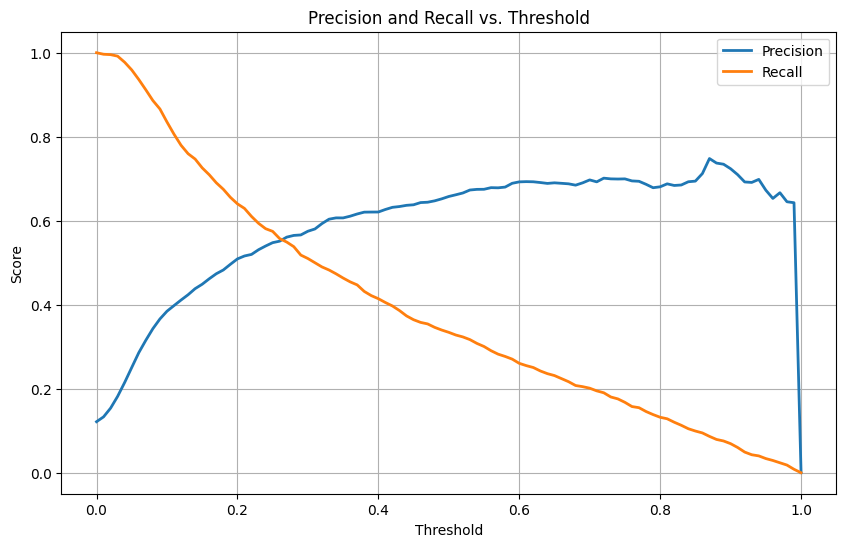

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_list, label="Precision", linewidth=2)
plt.plot(thresholds, recall_list, label="Recall", linewidth=2)
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Convert lists to numpy arrays for vectorized operations
precision_array = np.array(precision_list)
recall_array = np.array(recall_list)
thresholds_array = np.array(thresholds)

# Exclude thresholds where both precision and recall are zero
valid_indices = ~((precision_array == 0) & (recall_array == 0))

# Apply the mask to arrays
precision_array_valid = precision_array[valid_indices]
recall_array_valid = recall_array[valid_indices]
thresholds_valid = thresholds_array[valid_indices]

# Compute the absolute difference for valid thresholds
diff = np.abs(precision_array_valid - recall_array_valid)

# Find the index of the minimum difference
min_index = np.argmin(diff)

# Get the threshold at this index
intersection_threshold = thresholds_valid[min_index]

# Get the corresponding precision and recall values
intersection_precision = precision_array_valid[min_index]
intersection_recall = recall_array_valid[min_index]

print(
    f"Precision and recall curves intersect at threshold {intersection_threshold:.3f}"
)
print(
    f"At this threshold, Precision = {intersection_precision:.3f}, Recall = {intersection_recall:.3f}"
)

Precision and recall curves intersect at threshold 0.260
At this threshold, Precision = 0.551, Recall = 0.557


### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.02
- 0.22
- 0.42
- 0.62

In [16]:
thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []

for threshold in thresholds:
    # Binarize predictions based on the threshold
    y_pred_binary = (y_pred_proba >= threshold).astype(int)

    # Compute F1 score
    f1 = f1_score(y_val, y_pred_binary, zero_division=0)
    f1_scores.append(f1)

In [17]:
# Convert list to numpy array
f1_scores_array = np.array(f1_scores)

# Find the index of the maximum F1 score
max_index = np.argmax(f1_scores_array)

# Get the threshold corresponding to the maximum F1 score
max_f1_threshold = thresholds[max_index]
max_f1_value = f1_scores_array[max_index]

print(f"Maximum F1 Score: {max_f1_value:.3f} at threshold {max_f1_threshold:.2f}")


Maximum F1 Score: 0.567 at threshold 0.20


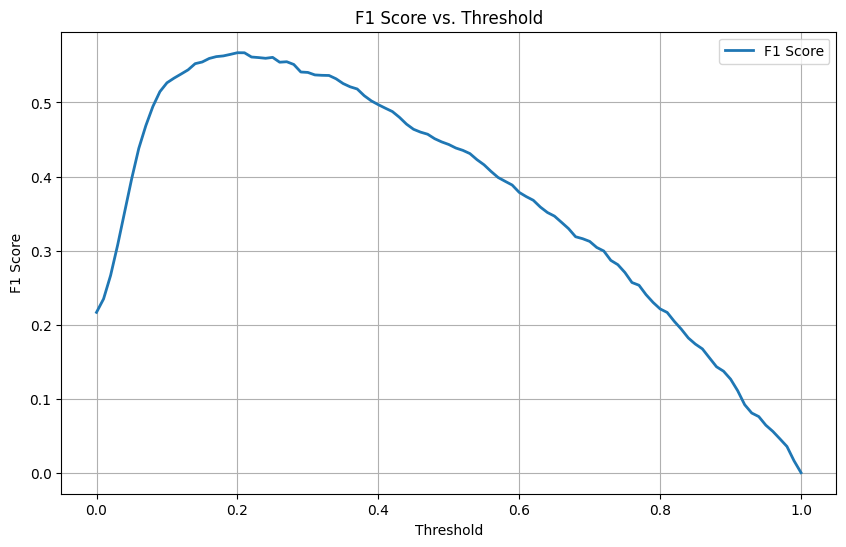

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score', linewidth=2)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.26

In [19]:
# Initial train/validation/test split
# df_full_train, df_test = train_test_split(df_bank, test_size=0.20, random_state=1)

In [20]:
# Initialize KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

auc_scores = []

# Convert 'y' to numpy array
y = df_full_train['y'].values

# Reset index to ensure proper alignment
df_full_train = df_full_train.reset_index(drop=True)

fold = 0

for train_idx, val_idx in kfold.split(df_full_train):
    fold += 1
    # Split the data
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    # Separate target and features
    y_train = df_train['y'].values
    y_val = df_val['y'].values

    # Drop 'y' from feature sets
    X_train = df_train.drop(columns=['y'])
    X_val = df_val.drop(columns=['y'])

    # Convert DataFrames to dictionaries for DictVectorizer
    train_dicts = X_train.to_dict(orient='records')
    val_dicts = X_val.to_dict(orient='records')

    # Initialize DictVectorizer
    dv = DictVectorizer(sparse=False)

    # Fit and transform the training data
    X_train_encoded = dv.fit_transform(train_dicts)

    # Transform the validation data
    X_val_encoded = dv.transform(val_dicts)

    # Initialize and train the logistic regression model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_encoded, y_train)

    # Predict probabilities on the validation set
    y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

    # Compute the AUC score
    auc = roc_auc_score(y_val, y_pred_proba)
    auc_scores.append(auc)

    print(f'AUC on fold {fold}: {auc:.4f}')


AUC on fold 1: 0.8993
AUC on fold 2: 0.8990
AUC on fold 3: 0.9112
AUC on fold 4: 0.9079
AUC on fold 5: 0.9120


In [21]:
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores, ddof=1)  # Use ddof=1 for sample standard deviation

print(f'\nMean AUC: {mean_auc:.4f}')
print(f'Standard Deviation of AUC: {std_auc:.4f}')


Mean AUC: 0.9059
Standard Deviation of AUC: 0.0063


### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [22]:
# Initialize KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

C_values = [0.000001, 0.001, 1]
mean_scores = {}
std_scores = {}

for C in C_values:
    auc_scores = []

    # Convert 'y' to numpy array
    y = df_full_train['y'].values

    # Reset index to ensure proper alignment
    df_full_train = df_full_train.reset_index(drop=True)

    fold = 0

    for train_idx, val_idx in kfold.split(df_full_train):
        fold += 1
        # Split the data
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        # Separate target and features
        y_train = df_train['y'].values
        y_val = df_val['y'].values

        # Drop 'y' from feature sets
        X_train = df_train.drop(columns=['y'])
        X_val = df_val.drop(columns=['y'])

        # Convert DataFrames to dictionaries for DictVectorizer
        train_dicts = X_train.to_dict(orient='records')
        val_dicts = X_val.to_dict(orient='records')

        # Initialize DictVectorizer
        dv = DictVectorizer(sparse=False)

        # Fit and transform the training data
        X_train_encoded = dv.fit_transform(train_dicts)

        # Transform the validation data
        X_val_encoded = dv.transform(val_dicts)

        # Initialize and train the logistic regression model
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train_encoded, y_train)

        # Predict probabilities on the validation set
        y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

        # Compute the AUC score
        auc = roc_auc_score(y_val, y_pred_proba)
        auc_scores.append(auc)

    # Compute mean and standard deviation of AUC scores
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores, ddof=1)  # Use ddof=1 for sample standard deviation

    # Round mean and std to 3 decimal digits
    mean_auc_rounded = round(mean_auc, 3)
    std_auc_rounded = round(std_auc, 3)

    mean_scores[C] = mean_auc_rounded
    std_scores[C] = std_auc_rounded

    print(f"C={C}, Mean AUC={mean_auc_rounded}, Std={std_auc_rounded}")


C=1e-06, Mean AUC=0.701, Std=0.011
C=0.001, Mean AUC=0.861, Std=0.008
C=1, Mean AUC=0.906, Std=0.006
